# Práctica 2

## Apartado 1: Visualización

### Visualización de las medidas

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Lectura de datos con pandas
df_all = pd.read_csv("mamografias.csv", na_values="?")

# Mostramos los primeros datos y vemos sus características
df_all.head()

BI-RADS   Age Shape  Margin  Density Severity
0      5.0  67.0     L     5.0      3.0  maligno
1      4.0  43.0     R     1.0      NaN  maligno
2      5.0  58.0     I     5.0      3.0  maligno
3      4.0  28.0     R     1.0      3.0  benigno
4      5.0  74.0     R     5.0      NaN  maligno

In [10]:
#Extraemos los valores con datos nulos
df = df_all.dropna()

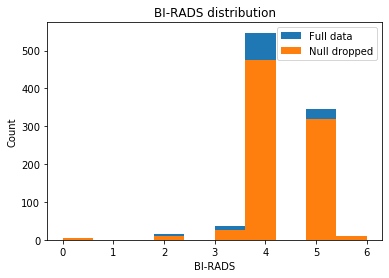

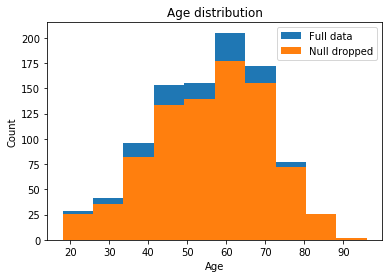

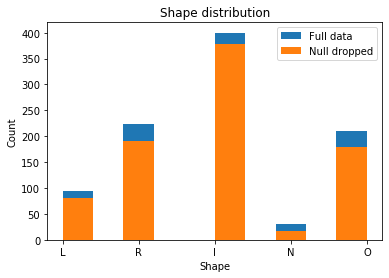

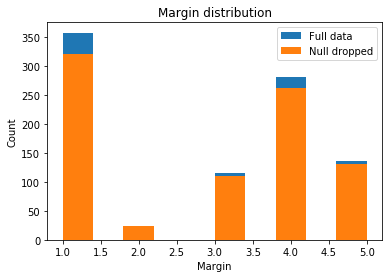

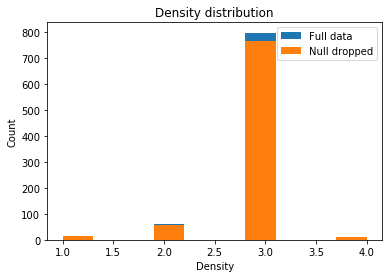

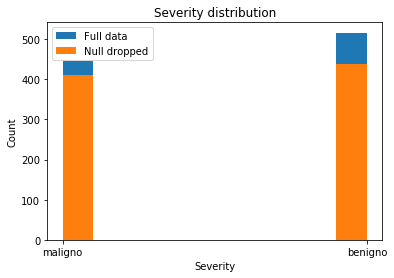

In [11]:
# Comprobamos que no hay ningun tipo de correlacion
for col in df.columns:
    plt.hist(df_all[col], label="Full data")
    plt.hist(df[col], label = "Null dropped")
    plt.title(col + " distribution")
    plt.legend()
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

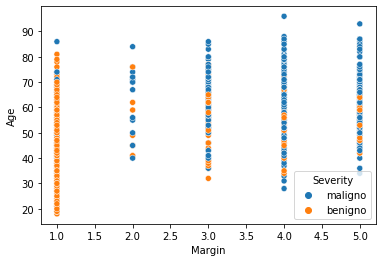

In [12]:
# Tenemos mejores gráficas y de más tipos
import seaborn as sns

# Aunque las siguientes quizás no sean las más útiles en este caso
sns.scatterplot(data=df, x="Margin", y="Age", hue="Severity")

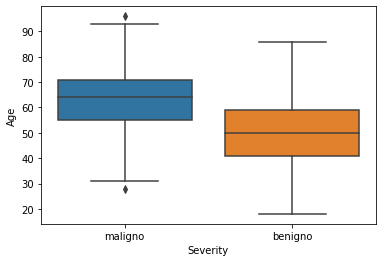

In [13]:
sns.boxplot(data=df, x='Severity', y='Age')

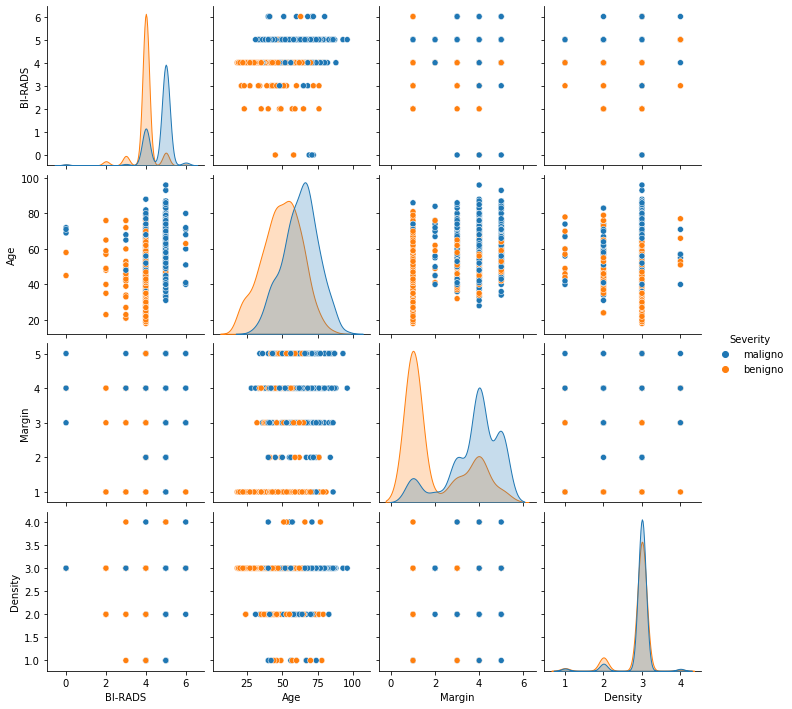

In [14]:
# Visualización más completa con todos los atributos numéricos
sns.pairplot(df, hue="Severity")

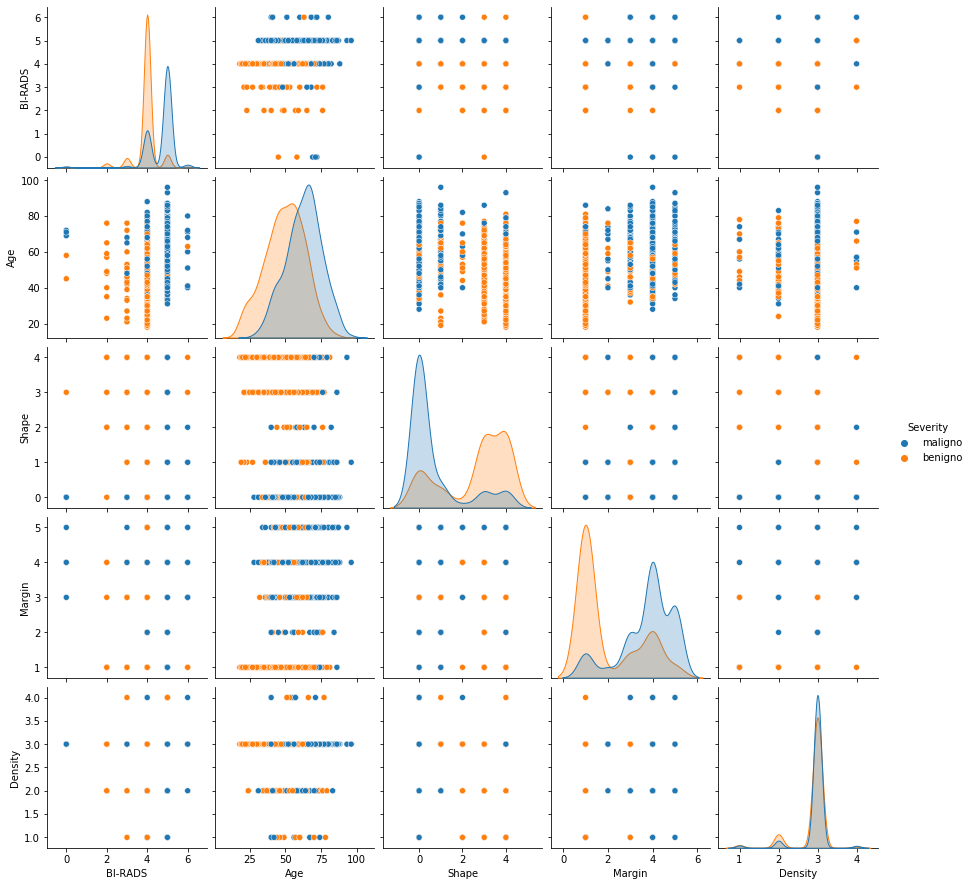

In [15]:
# Codificamos las columnas representadas con cadenas para que se muestren como enteros
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Shape"] = le.fit_transform(df["Shape"])

sns.pairplot(df, hue="Severity")

### Gráficas de curva ROC

In [16]:
# Importamos la herramienta y hacemos la división en entrenamiento y test
import numpy as np
from sklearn.model_selection import train_test_split

df["Severity"] = le.fit_transform(df["Severity"])
data = np.array(df)

# Division de los datos entre atributos y clases
features = data[:,:-1]
tarjets = data[:,-1]

# Division entre datos de entrenamiento y datos de test
x_train, x_test, y_train, y_test = train_test_split(features, tarjets, test_size = 0.20, random_state = 0)


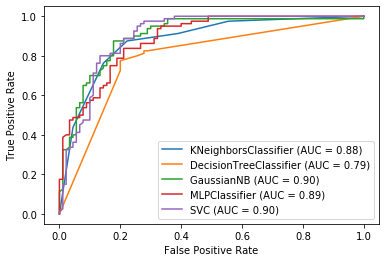

In [24]:
# Primero entrenamos los modelos que teníamos
from sklearn import metrics


# Creación del clasificador kNN
from sklearn.neighbors import KNeighborsClassifier

KnnClf = KNeighborsClassifier(n_neighbors=5)
KnnClf.fit(x_train, y_train)

# Creacion del clasificador Decision Tree
from sklearn import tree

DecTreeClf = tree.DecisionTreeClassifier(random_state=0)
DecTreeClf.fit(x_train, y_train)

# Creacion del clasificador Naive-Bayes
from sklearn.naive_bayes import GaussianNB

GaussianClf = GaussianNB()
GaussianClf.fit(x_train, y_train)

# Creacion del clasificador MultiLayer Perceptron
from sklearn.neural_network import MLPClassifier

PerceptronClf = MLPClassifier(hidden_layer_sizes=100, random_state=0)
PerceptronClf.fit(x_train, y_train)

# Creacion del clasificador SVM
from sklearn.svm import SVC

SvmClf = SVC(random_state=0, gamma='auto')
SvmClf.fit(x_train, y_train)


# Mostramos todas las curvas en una misma gráfica
ax = plt.gca()

for model in [KnnClf, DecTreeClf, GaussianClf, PerceptronClf, SvmClf]:
    metrics.plot_roc_curve(model, x_test, y_test, ax=ax)


## Apartado 2: Clustering

Nos interesaremos en segmentar los accidentes seleccionando previamente grupos de interés
según las variables categóricas.

Por ejemplo, analizar solo accidentes donde ha habido colisión
de vehículos, solo en carreteras urbanas, en determinadas condiciones ambientales, etc.

Queda a elección libre del alumno escoger dos casos de uso y
realizar el estudio sobre cada uno de ellos.

Será necesario también aplicar una normalización para
que las métricas de distancia y la visualización funcionen correctamente.

### Caso de estudio 1

In [28]:
import pandas as pd

# Lectura de datos con pandas
df_all = pd.read_csv("accidentes_2013.csv", na_values="?")

# Mostramos los primeros datos y vemos sus características
df_all.head()

MES  HORA  DIASEMANA  PROVINCIA COMUNIDAD_AUTONOMA        ISLA  \
0    8  14.0          3    Bizkaia         País Vasco  NO_ES_ISLA   
1    6  18.0          6    Bizkaia         País Vasco  NO_ES_ISLA   
2   11  17.0          2  Tarragona           Cataluña  NO_ES_ISLA   
3    1   9.0          3     Lleida           Cataluña  NO_ES_ISLA   
4   11  22.0          7  Barcelona           Cataluña  NO_ES_ISLA   

   TOT_VICTIMAS  TOT_VICTIMAS30D  TOT_MUERTOS  TOT_MUERTOS30D  ...  \
0             3                3            0        0.054104  ...   
1             1                1            0        0.000000  ...   
2             2                2            0        0.000000  ...   
3             2                2            0        0.000000  ...   
4             2                2            0        0.000000  ...   

              PRIORIDAD  SUPERFICIE_CALZADA                    LUMINOSIDAD  \
0  NINGUNA (SOLO NORMA)              MOJADA                      PLENO DÍA   
1              SEMÁFORO              MOJADA                      PLENO DÍA   
2         SEÑAL DE STOP       SECA Y LIMPIA                      PLENO DÍA   
3                   NaN              MOJADA                      PLENO DÍA   
4                   NaN              MOJADA  NOCHE: ILUMINACIÓN SUFICIENTE   

   FACTORES_ATMOSFERICOS  VISIBILIDAD_RESTRINGIDA OTRA_CIRCUNSTANCIA  \
0          LLUVIA FUERTE    FACTORES ATMOSFÉRICOS               OTRA   
1            LLOVIZNANDO               OTRA_CAUSA            NINGUNA   
2            BUEN TIEMPO                      NaN            NINGUNA   
3            LLOVIZNANDO                      NaN            NINGUNA   
4          LLUVIA FUERTE                      NaN            NINGUNA   

         ACERAS                                     TIPO_ACCIDENTE  \
0  NO HAY ACERA          Colisión de vehículos en marcha (Frontal)   
1  NO HAY ACERA          Colisión de vehículos en marcha (Alcance)   
2  NO HAY ACERA    Colisión de vehículos en marcha (Frontolateral)   
3  NO HAY ACERA  Colisión de vehículos en marcha (Múltiple o en...   
4  NO HAY ACERA    Colisión de vehículos en marcha (Frontolateral)   

  DENSIDAD_CIRCULACION MEDIDAS_ESPECIALES  
0               FLUIDA     NINGUNA MEDIDA  
1                DENSA     NINGUNA MEDIDA  
2                  NaN                NaN  
3                  NaN     NINGUNA MEDIDA  
4                  NaN                NaN  

[5 rows x 32 columns]